
# Öğrenci Yaşam Biçimi Keşifsel Veri Analizi

Öğrenci yaşam biçimi veri seti öğrencilerin gün içinde saatlerini hangi aktiviler için ne kadar harcadığını, stres seviyelerini ve başarı notlarını tutan bir veri setidir.Veri setine ulaşmak için aşağıda verilen Kaggle bağlantısını takip edebilir ve değişkenler hakkındaki bilgilere aşağıdan ulaşabilirsiniz.

Öğrenci Yaşam Biçimi Veri Seti: https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset

**Değişkenler**

* Student_ID : Öğrencilere 1'den başlanarak atanan kimlik numarasıdır.
* Study_Hours_Per_Day: Öğrencilerin gün içerisinde çalışmaya ayırdıkları saat miktarıdır.
* Extracurricular_Hours_Per_Day: Öğrencilerin gün içerisinde ekstra çalışmaya ayırdıkları saat miktarıdır.
* Sleep_Hours_Per_Day: Öğrencilerin gün içerisinde uykuya ayırdıkları saat miktarıdır.
* Social_Hours_Per_Day: Öğrencilerin gün içerisinde sosyal aktiviteye ayırdıkları saat miktarıdır.
* Physical_Activity_Hours_Per_Day: Öğrencilerin gün içerisinde fiziksel aktiviteye ayırdıkları saat miktarıdır.
* GPA: Öğrencilerin başarı notudur.
* Stress_Level: Öğrencilerin bulunduğu stres seviyesidir.

## 0. Veri Setinin Hazırlanması

In [1]:
# necessary libraries
import numpy as np  # numerical operations 
import pandas as pd  # data manipulation 
import seaborn as sns  # visualization
import matplotlib.pyplot as plt  # visualization

# for warning messages in visual outputs
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading the data into the student variable
stu_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv")
stu = stu_.copy()


In [3]:
# Check if there are any missing values in the DataFrame
stu.isna().sum().sum()

0

## 1. Veriye İlk Bakış

In [4]:
stu.head() # first 5 rows of the data

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [5]:
stu.shape # number of rows and columns in the data

(2000, 8)

Veri seti 2000 satır ve 8 sütundan oluşuyor.

In [6]:
stu.info() # structural information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [7]:
# Converting columns of type float64 to float32
stu = stu.astype({col: 'float32' for col in stu.select_dtypes(include='float64').columns})
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float32
 2   Extracurricular_Hours_Per_Day    2000 non-null   float32
 3   Sleep_Hours_Per_Day              2000 non-null   float32
 4   Social_Hours_Per_Day             2000 non-null   float32
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float32
 6   GPA                              2000 non-null   float32
 7   Stress_Level                     2000 non-null   object 
dtypes: float32(6), int64(1), object(1)
memory usage: 78.2+ KB


In [8]:
# Converting the 'Stress_Level' column to category format
stu['Stress_Level'] = pd.Categorical(stu['Stress_Level'])
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Student_ID                       2000 non-null   int64   
 1   Study_Hours_Per_Day              2000 non-null   float32 
 2   Extracurricular_Hours_Per_Day    2000 non-null   float32 
 3   Sleep_Hours_Per_Day              2000 non-null   float32 
 4   Social_Hours_Per_Day             2000 non-null   float32 
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float32 
 6   GPA                              2000 non-null   float32 
 7   Stress_Level                     2000 non-null   category
dtypes: category(1), float32(6), int64(1)
memory usage: 64.7 KB


In [9]:
# Define categorical values in the correct order
Lev_categories = ["Low", "Moderate", "High"]

# Create CategoricalDtype
from pandas.api.types import CategoricalDtype
stu["Stress_Level"] = stu["Stress_Level"].astype(CategoricalDtype(categories=Lev_categories, ordered=True))

In [10]:
# Display the first 5 entries of the "Stress_Level" column
stu["Stress_Level"].head()

0    Moderate
1         Low
2         Low
3    Moderate
4        High
Name: Stress_Level, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

Betimsel istatistiklerle, veri setindeki sayısal değerlerin ortalamadan ne kadar uzak olduğunu gözlemleriz. Kabaca, amacımız veri setindeki özelliklerin merkezi eğilimlerini ve dağılımlarını incelemek olacaktır. Pandas, bunun için describe() metoduna sahiptir. Bu metot eksik gözlemleri göz ardı eder ve kategorik (sayısal olmayan) değişkenleri dikkate almaz.

In [11]:
# Generate descriptive statistics for the DataFrame 
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460948,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


## 2. Eksik Veri Analizi

Eksik veriler ile nasıl baş edebileceği göstermek için bu foksiyon ile veri setinde homojen bir şekilde eksik veriler yarattım. 

In [12]:
# Creating Random Missing Values in the Dataset
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    stu_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    stu_size = dataframe.size
    num_missing = int(stu_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        stu_missing.iat[row_idx, col_idx] = np.nan
        
    return stu_missing

stu_fillna = add_random_missing_values(dataframe = stu,
                               missing_rate = 0.03)

In [13]:
# reaching missing observations
stu_fillna.isna().sum()

Student_ID                         63
Study_Hours_Per_Day                58
Extracurricular_Hours_Per_Day      46
Sleep_Hours_Per_Day                68
Social_Hours_Per_Day               69
Physical_Activity_Hours_Per_Day    49
GPA                                64
Stress_Level                       56
dtype: int64

#### Eksik Değerler:

* Verinin dağılımını ve betimsel istatistiklerini etkiler.
* Makine öğrenimi modellerinin sonuçları üzerinde olumsuz bir etkiye sahip olabilir.
* İstatistiksel testlerin gücünü azaltabilir.



####  Eksik Değerleri Kaldırma
**Silme:**

Eksik değer rastgele oluştuğunda kullanılabilir, ancak bu durum veride yanlılığa yol açabilir.
* Bir gözlem biriminde %50-60 oranında eksiklik varsa, tamamen silmek iyi bir seçenek olabilir.

**Doldurma:**

Eksik değerler birçok farklı yöntemle doldurulabilir:

* Betimsel İstatistiklerle Doldurma: Ortanca (median), ortalama (mean) veya mod (mode) gibi betimsel istatistiklerle doldurma.
* KNN ile Doldurma: KNN algoritması, eksik değeri, eksik değerin bulunduğu satırın en yakın komşularının değerlerini kullanarak tahmin eder.
* Bir Alt veya Üst Satırdaki Verilerle Doldurma: Eksik değer, bir önceki veya sonraki satırdaki veriyle doldurulabilir.


In [14]:
# Let's see the total number of missing and non-missing observations in the dataset.
print(f"The dataset contains a total of {stu_fillna.notnull().sum().sum()} non-missing observations and {stu_fillna.isnull().sum().sum()} missing observations.")


The dataset contains a total of 15527 non-missing observations and 473 missing observations.


In [15]:
# We can also access records with at least one missing observation.
stu_fillna[stu_fillna.isnull().any(axis=1)]

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
3,4.0,6.5,2.1,NaN,1.7,6.5,2.88,Moderate
4,5.0,8.1,0.6,6.5,2.2,6.6,NaN,High
14,15.0,NaN,0.3,6.8,0.7,7.3,3.40,High
19,20.0,6.6,2.0,9.5,1.5,4.4,2.93,NaN
25,26.0,9.7,1.3,7.6,3.8,1.6,NaN,High
...,...,...,...,...,...,...,...,...
1990,1991.0,8.6,NaN,9.2,2.2,0.2,3.26,High
1992,1993.0,7.5,2.1,9.9,4.1,0.4,NaN,Moderate
1994,1995.0,7.9,NaN,9.0,0.5,3.2,3.08,Moderate
1995,NaN,6.5,0.2,7.4,2.1,7.8,3.32,Moderate


In [16]:
# Let's retrieve records with no missing observations.
stu_fillna[stu_fillna.notnull().all(axis=1)][:5]

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1.0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2.0,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3.0,5.1,3.9,9.2,1.2,4.6,2.67,Low
5,6.0,6.0,2.1,8.0,0.3,7.6,2.85,Moderate
6,7.0,8.0,0.7,5.3,5.7,4.3,3.08,High


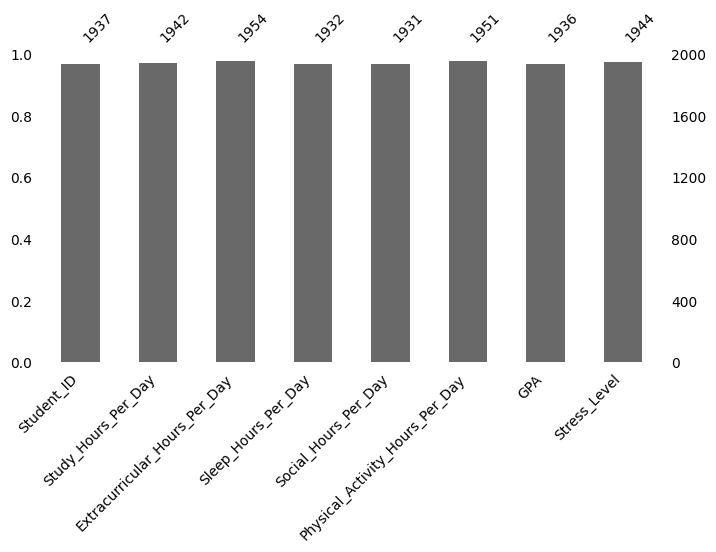

In [17]:
# !pip install missingno -> You need to install the missingno library first to use it.
import missingno as msno

msno.bar(stu_fillna, 
         figsize = (8, 4), 
         fontsize = 10);

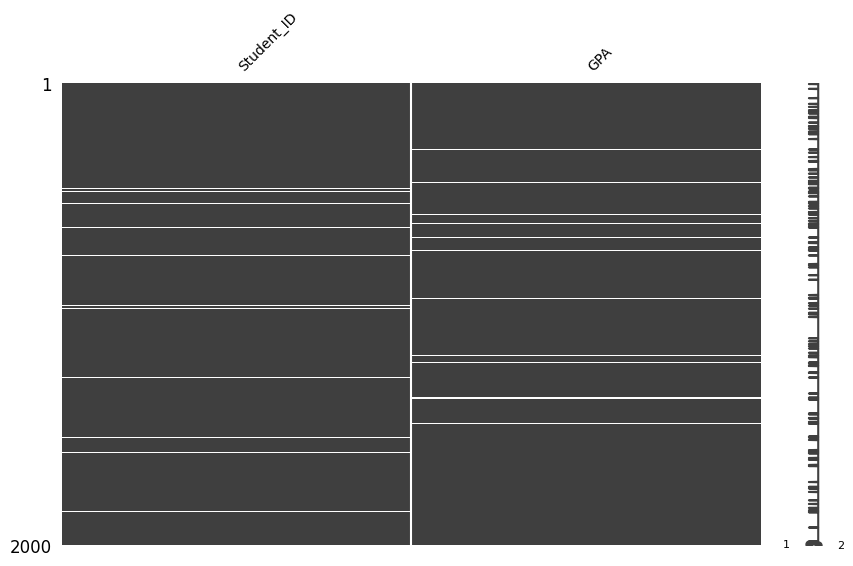

In [18]:
# msno.matrix() can be used to visually identify if missing values are related across variables.
msno.matrix(stu_fillna[['Student_ID', 'GPA']], 
            figsize=(10, 6), 
            fontsize=10);

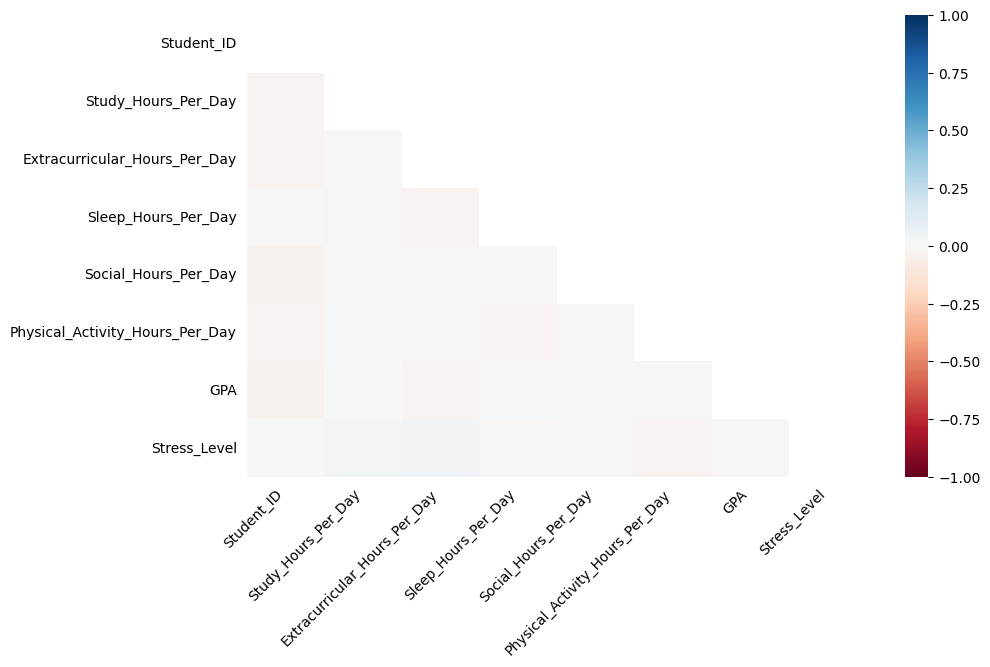

In [19]:
# Nullity Correlation (Heatmap)
# The closer to 1, the higher the likelihood of a relationship.
# If it is 0, there is no correlation between the variables.
msno.heatmap(stu_fillna, 
             figsize=(10, 6), 
             fontsize=10);

#### 2.1 Eksik Veriyi Doldurma

Eğer veriler veri setinde bir yerde kümelenmişse, örneğin belirli bir sütunda, o zaman veriyi silmeyi düşünebiliriz. Ancak, elimdeki veri setinde eksik değerler düzgün bir şekilde dağılmış durumda, bu yüzden eksik verileri uygun tekniklerle doldurmak daha iyi bir çözüm olacaktır. Aksi takdirde, önemli miktarda veri kaybı riskiyle karşılaşırım.

In [20]:

stu_fillna.head(3)  # Display the first 3 rows of the copied dataset


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1.0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2.0,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3.0,5.1,3.9,9.2,1.2,4.6,2.67,Low


In [21]:
# Check the number of missing (NaN) values in each column of the DataFrame
stu_fillna.isna().sum()

Student_ID                         63
Study_Hours_Per_Day                58
Extracurricular_Hours_Per_Day      46
Sleep_Hours_Per_Day                68
Social_Hours_Per_Day               69
Physical_Activity_Hours_Per_Day    49
GPA                                64
Stress_Level                       56
dtype: int64

Elimdeki sayısal verilerin dağılımını inceleyerek eksik verileri ortalama, medyan veya başka bir yöntemle doldurmaya karar vereceğim.

In [22]:
# Function to plot histogram for a given variable
def plot_hist(variable):
    plt.figure(figsize=(9, 5))  # Set width to 9 units and height to 5 units for the plot
    plt.hist(stu_fillna[variable], bins=10)  # Split the histogram into 10 equal bins
    plt.xlabel(variable)  # Set the x-axis label
    plt.ylabel("Frequency")  # Set the y-axis label
    plt.title("{} Histogram Distribution".format(variable))  # Set the title of the plot
    plt.show()  # Display the plot

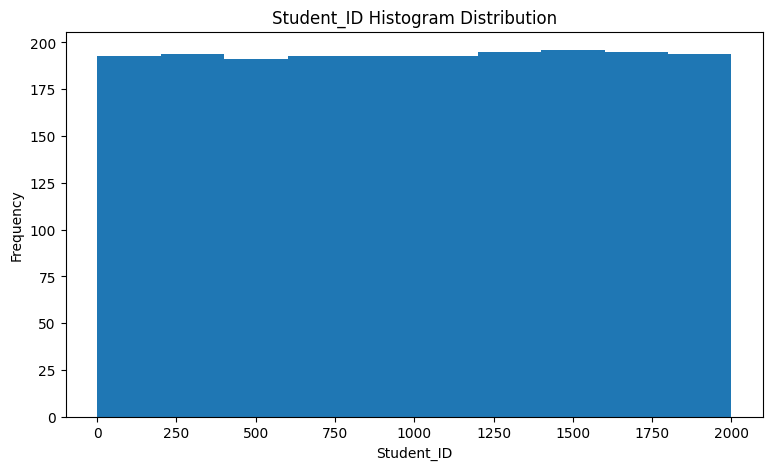

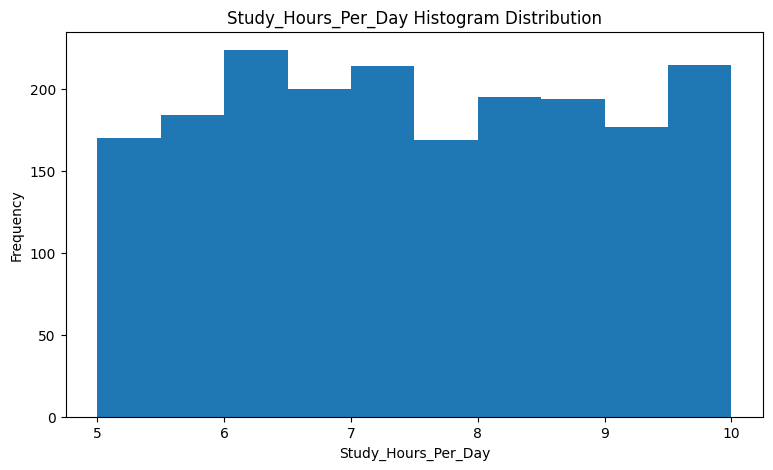

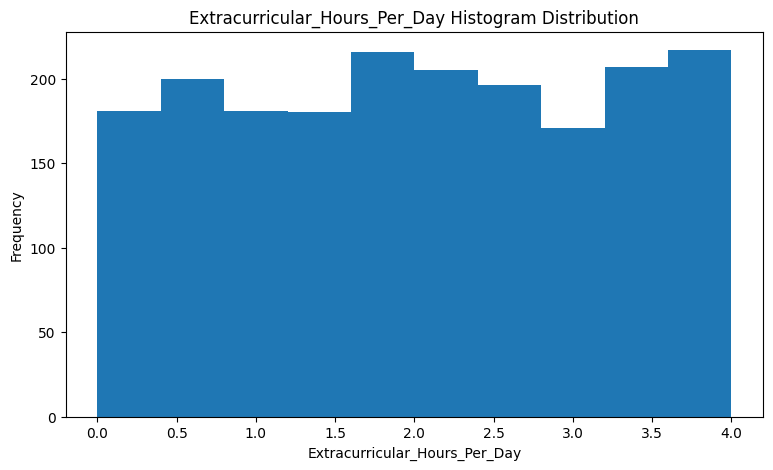

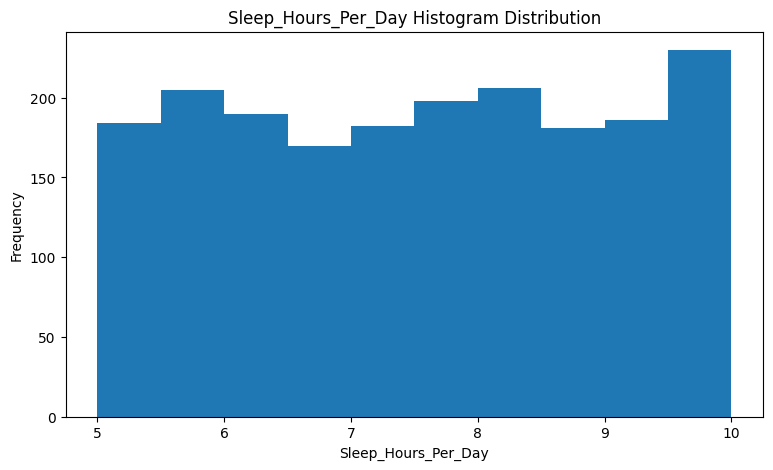

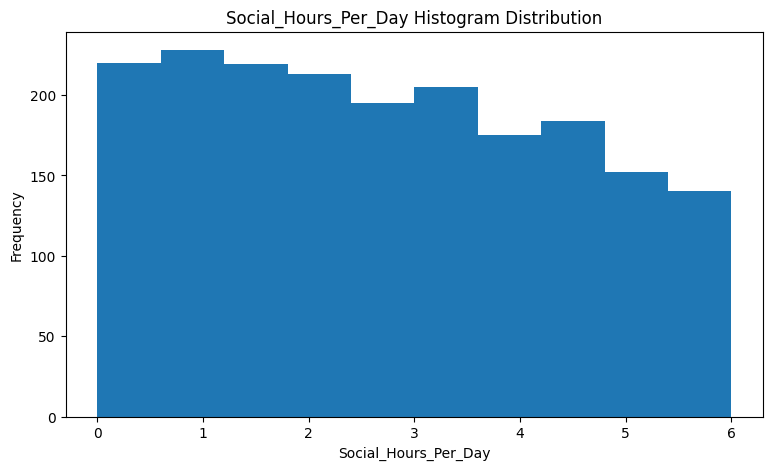

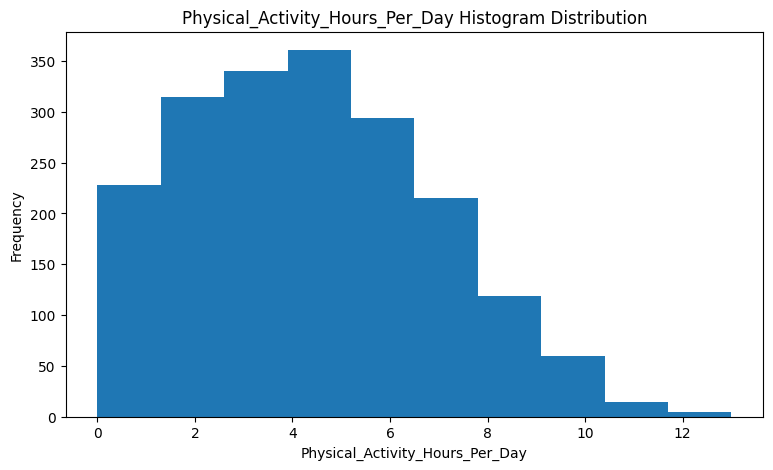

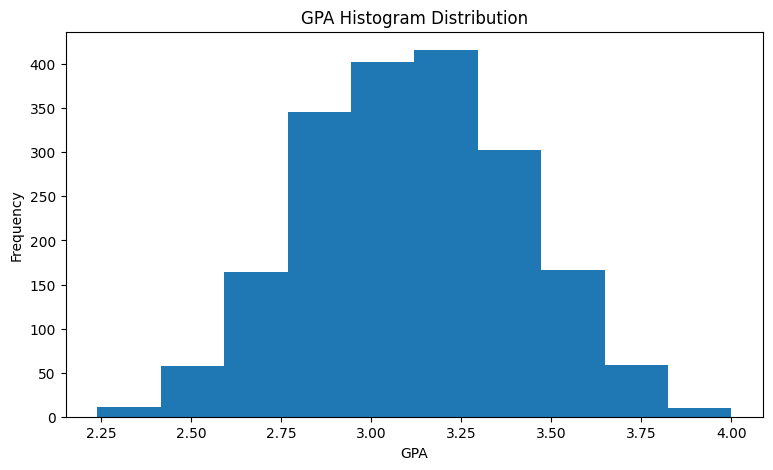

In [23]:
# Draw the histogram for "Student_ID","Study_Hours_Per_Day","Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day","Social_Hours_Per_Day","Physical_Activity_Hours_Per_Day"
numericVar = ["Student_ID","Study_Hours_Per_Day","Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day","Social_Hours_Per_Day","Physical_Activity_Hours_Per_Day","GPA"]
for n in numericVar:
    plot_hist(n)  

Student_ID sutünunun sahip olduğu ardışık yapıdan dolayı eksik veriyi bir önceki verinin bir fazlası şeklinde dolduracağım.

In [24]:
# Fill missing values by backfilling and adding 1 to the previous value
stu_fillna['Student_ID'] = stu_fillna['Student_ID'].fillna(stu_fillna['Student_ID'].bfill() + 1)
stu_fillna.isna().sum()


Student_ID                          0
Study_Hours_Per_Day                58
Extracurricular_Hours_Per_Day      46
Sleep_Hours_Per_Day                68
Social_Hours_Per_Day               69
Physical_Activity_Hours_Per_Day    49
GPA                                64
Stress_Level                       56
dtype: int64

"Sleep_Hours_Per_Day",Study_Hours_Per_Day, Extracurricular_Hours_Per_Day sütunlarının dağılımından kaynaklı ve aldığı verileri göz önüne aldığımızda doldurma şeklini önce her sütun için uygun seriler yaratıp ardından bu değerleri eşit oranda rastgele olarak eksik verilere dağıtmak en uygun yöntem olucaktır.

In [25]:
# Define sensible ranges for each column
fill_values = {
    "Study_Hours_Per_Day": [ 5, 6, 7, 8,9,10],      # Reasonable range for study hours
    "Sleep_Hours_Per_Day": [5, 6, 7, 8,9,10],       # Reasonable range for sleep hours
    "Extracurricular_Hours_Per_Day": [0,1, 2, 3, 4] # Reasonable range for extracurricular activities
}

# Fill missing values with equal probability for each possible value in the range
for col in fill_values.keys():
    # Calculate probability for each value to be chosen equally
    prob = [1/len(fill_values[col])] * len(fill_values[col])
    
     # Identify missing values
    mask = stu_fillna[col].isna()
    # Fill missing values with randomly selected values from the predefined range
    stu_fillna.loc[mask, col] = np.random.choice(
        fill_values[col], 
        size=mask.sum(), 
        p=prob  # Equal probability distribution
    )
stu_fillna.isna().sum()

Student_ID                          0
Study_Hours_Per_Day                 0
Extracurricular_Hours_Per_Day       0
Sleep_Hours_Per_Day                 0
Social_Hours_Per_Day               69
Physical_Activity_Hours_Per_Day    49
GPA                                64
Stress_Level                       56
dtype: int64

"Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day" sütunlarının dağılımından kaynaklı medyan ile doldurma doğru bir yöntem olucaktır.

In [26]:
# Filling missing values using a loop with the median value of the column
me_filled = ["Social_Hours_Per_Day","Physical_Activity_Hours_Per_Day"]

for col in me_filled:
    stu_fillna[col].fillna(stu[col].median(), inplace = True)
stu_fillna.isna().sum()

Student_ID                          0
Study_Hours_Per_Day                 0
Extracurricular_Hours_Per_Day       0
Sleep_Hours_Per_Day                 0
Social_Hours_Per_Day                0
Physical_Activity_Hours_Per_Day     0
GPA                                64
Stress_Level                       56
dtype: int64

GPA sütununun sahip olduğu dağılımın simetrik olmasından dolayı ortalama ile eksik verileri dolduracağım.

In [27]:
# Fill missing values in the "GPA" column with the mean value of the column
stu_fillna["GPA"].fillna(stu["GPA"].mean(), inplace = True)
stu_fillna.isna().sum()

Student_ID                          0
Study_Hours_Per_Day                 0
Extracurricular_Hours_Per_Day       0
Sleep_Hours_Per_Day                 0
Social_Hours_Per_Day                0
Physical_Activity_Hours_Per_Day     0
GPA                                 0
Stress_Level                       56
dtype: int64

#### 2.1.2 Kategorik Değişkenleri Doldurma

Veri setindeki kategorik verilere göz atmak istiyorum.

In [28]:
# We can use select_dtypes() to select variables containing a specific data type.
stu_categorical = stu_fillna.select_dtypes(include='category')
stu_categorical.head(3)

,Stress_Level
0,Moderate
1,Low
2,Low


In [29]:
# We can use nunique() to see the number of unique values in categorical variables.

print(f'There are {stu_categorical["Stress_Level"].nunique()} unique values in the "{"Stress_Level"}" categorical feature.\n')


There are 3 unique values in the "Stress_Level" categorical feature.



In [30]:
# Using value_counts() to find the total count of observations for each categorical variable.

print(f'{stu_categorical["Stress_Level"].value_counts()}\n')

Stress_Level
High        1001
Moderate     655
Low          288
Name: count, dtype: int64



Eksik veriyi, dolu verinin oransalığı hesaplayıp bu oranlamaya göre doldurmak en uygun yöntem olucaktır.

In [31]:
# Define possible values for "Stress_Level" and their associated probabilities
fill_valuesx = ["High","Moderate","Low"]
probabilities = [0.51,0.34,0.15]

# Identify missing values in the "Stress_Level" column
mask = stu_fillna["Stress_Level"].isna()

# Fill missing values in "Stress_Level" with random choices based on the defined probabilities
stu_fillna.loc[mask, "Stress_Level"] = np.random.choice(
        fill_valuesx, 
        size=mask.sum(), 
        p=probabilities )

stu_fillna.isna().sum()


Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

#### 2.2 Makine Öğrenimi ile Doldurma Teknikleri

Eksik değerleri doldurmak için makine öğrenimi yöntemleri kullanılabilir.

**Hangi yöntemler kullanılabilir?:**

* KNNImputer (K-En Yakın Komşu)
* Random Forest Classifier (Rastgele Orman Sınıflandırıcı)

## 3. Verinin Görselleştirme İşlemleri

In [32]:
stu.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [33]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460948,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


In [34]:
# Filter students based on their stress level
stu_low = stu[stu['Stress_Level'] == 'Low'] 
stu_moderate = stu[stu['Stress_Level'] == 'Moderate']  
stu_high = stu[stu['Stress_Level'] == 'High']

In [35]:
stu_low.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,297.0,922.367003,586.479202,2.00,390.00,892.00,1451.00,1982.00
Study_Hours_Per_Day,297.0,5.474411,0.279753,5.00,5.20,5.50,5.70,5.90
Extracurricular_Hours_Per_Day,297.0,1.988889,1.200075,0.00,0.90,2.00,3.00,4.00
Sleep_Hours_Per_Day,297.0,8.063973,1.205259,6.00,7.10,8.00,9.10,10.00
Social_Hours_Per_Day,297.0,2.890909,1.673669,0.00,1.40,3.00,4.20,6.00
Physical_Activity_Hours_Per_Day,297.0,5.581819,2.377216,0.10,4.00,5.30,7.40,12.40
GPA,297.0,2.816869,0.215396,2.24,2.68,2.82,2.95,3.58


In [36]:
stu_moderate.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,674.0,1065.238872,563.769570,1.00,610.50,1052.50,1541.750,1998.00
Study_Hours_Per_Day,674.0,6.969584,0.597576,6.00,6.40,7.00,7.400,8.00
Extracurricular_Hours_Per_Day,674.0,2.006380,1.142807,0.00,1.10,2.00,3.000,4.00
Sleep_Hours_Per_Day,674.0,7.947627,1.167592,6.00,6.90,7.90,8.975,10.00
Social_Hours_Per_Day,674.0,2.739614,1.692064,0.00,1.30,2.60,4.200,6.00
Physical_Activity_Hours_Per_Day,674.0,4.336795,2.243163,0.00,2.60,4.25,6.000,11.00
GPA,674.0,3.024837,0.220653,2.44,2.87,3.02,3.180,3.75


In [37]:
stu_high.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,1029.0,980.647230,580.074266,5.00,460.00,972.00,1477.00,2000.0
Study_Hours_Per_Day,1029.0,8.385034,1.238311,5.00,8.00,8.70,9.30,10.0
Extracurricular_Hours_Per_Day,1029.0,1.979786,1.152370,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,1029.0,7.046453,1.552568,5.00,5.60,6.80,8.40,10.0
Social_Hours_Per_Day,1029.0,2.627794,1.687129,0.00,1.20,2.40,4.00,6.0
Physical_Activity_Hours_Per_Day,1029.0,3.960933,2.603957,0.00,1.80,3.60,5.70,13.0
GPA,1029.0,3.261973,0.274960,2.31,3.09,3.27,3.46,4.0


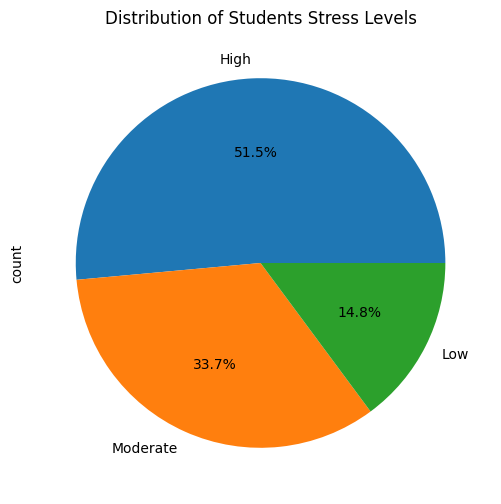

In [38]:
# Create a pie chart showing the distribution of stress levels among students
plt.figure(figsize=(8,6))
stu['Stress_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Students Stress Levels')
plt.show()

**Amaç:**  Bundan sonra Boxplot ve violonplot grafikleri ile öğrencilerin stress seviyerine bağlı olarak günlük zaman harcamaları arasındaki farklılıkların incelenmesi amaçlanmıştır.

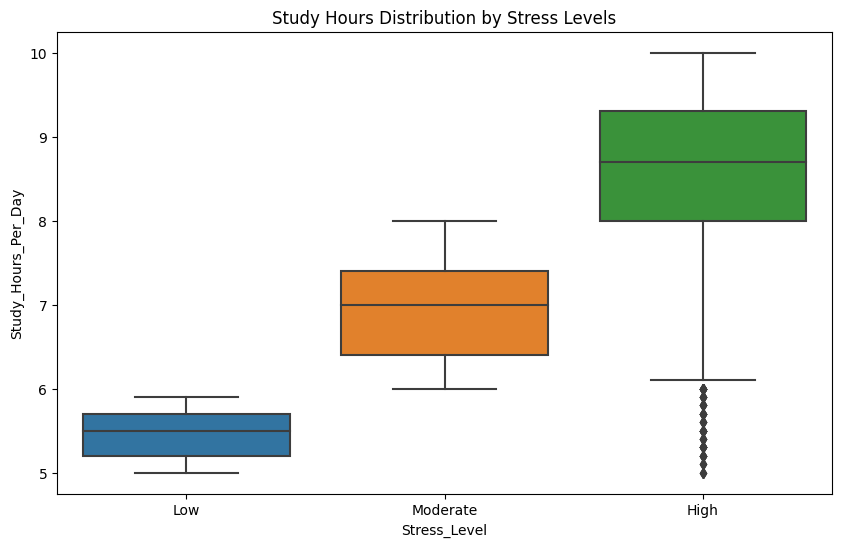

In [39]:
# Create a boxplot to show the distribution of study hours per day according to stress levels
plt.figure(figsize=(10,6))
sns.boxplot(x='Stress_Level', y='Study_Hours_Per_Day', data=stu, order=['Low', 'Moderate', 'High'])
plt.title('Study Hours Distribution by Stress Levels')
plt.show()


Stress seviyesinin artması ile boxplot sayesinde aykırı verileri göz ardı ederek yapılan gözlem ile öğrencilerin çalışma saati aralığının yukarı çıktığı gözlemleniyor.

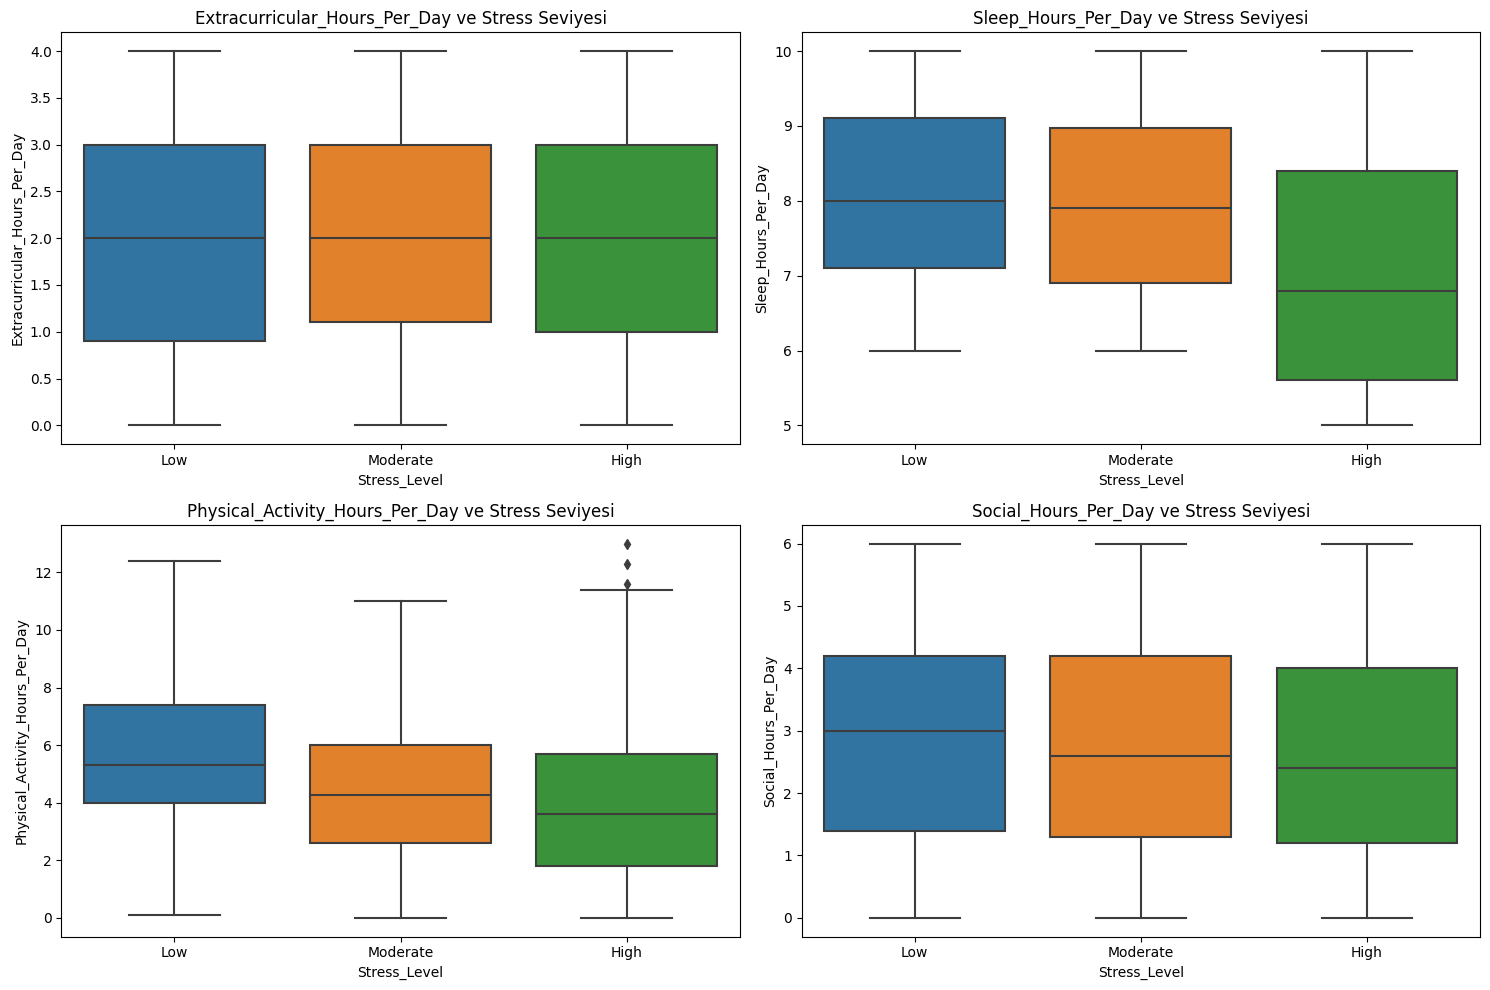

In [40]:
# Create boxplots for various activities vs. stress levels in a 2x2 grid
plt.figure(figsize=(15,10))
activities = ['Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
                   'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']

# Loop through each activity and create a subplot for it
for i, activity in enumerate(activities, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='Stress_Level', y=activity, data=stu, order=['Low', 'Moderate', 'High'])
    plt.title(f'{activity} ve Stress Seviyesi')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


Stres seviyesine göre gruplandırılan öğrencilerin günlük zaman harcaması arasındaki en büyük farklılık fiziksel aktivite ve uyku saatlerinde  görülmektedir. 
* Stres seviyesine göre gruplandırılan öğrencilerin  fiziksel aktivite saatleri incelendiğinde öğrencilerin fiziksel aktivite saatleri bakımından yakın bir aralıkta hareket etmesiyle beraber çeyreklikler arasındaki veri kıyaslandığında stress seviyesinin düşmesi ile fiziksel aktivite saatinin çeyrekliklerdeki aralığının artığı gözlemleniyor.
* Stres seviyesine göre gruplandırılan öğrencilerin uyku saatleri incelendiğinde ise yüksek stress seviyesindeki grubun geniş bir saat aralığına sahip olmasıyla beraber çeyreklikler arasında kıyas yapıldığında sahip olduğu uyku saati aralığın diğer gruplardan daha düşük bir aralıkta olduğu gözlemleniyor.

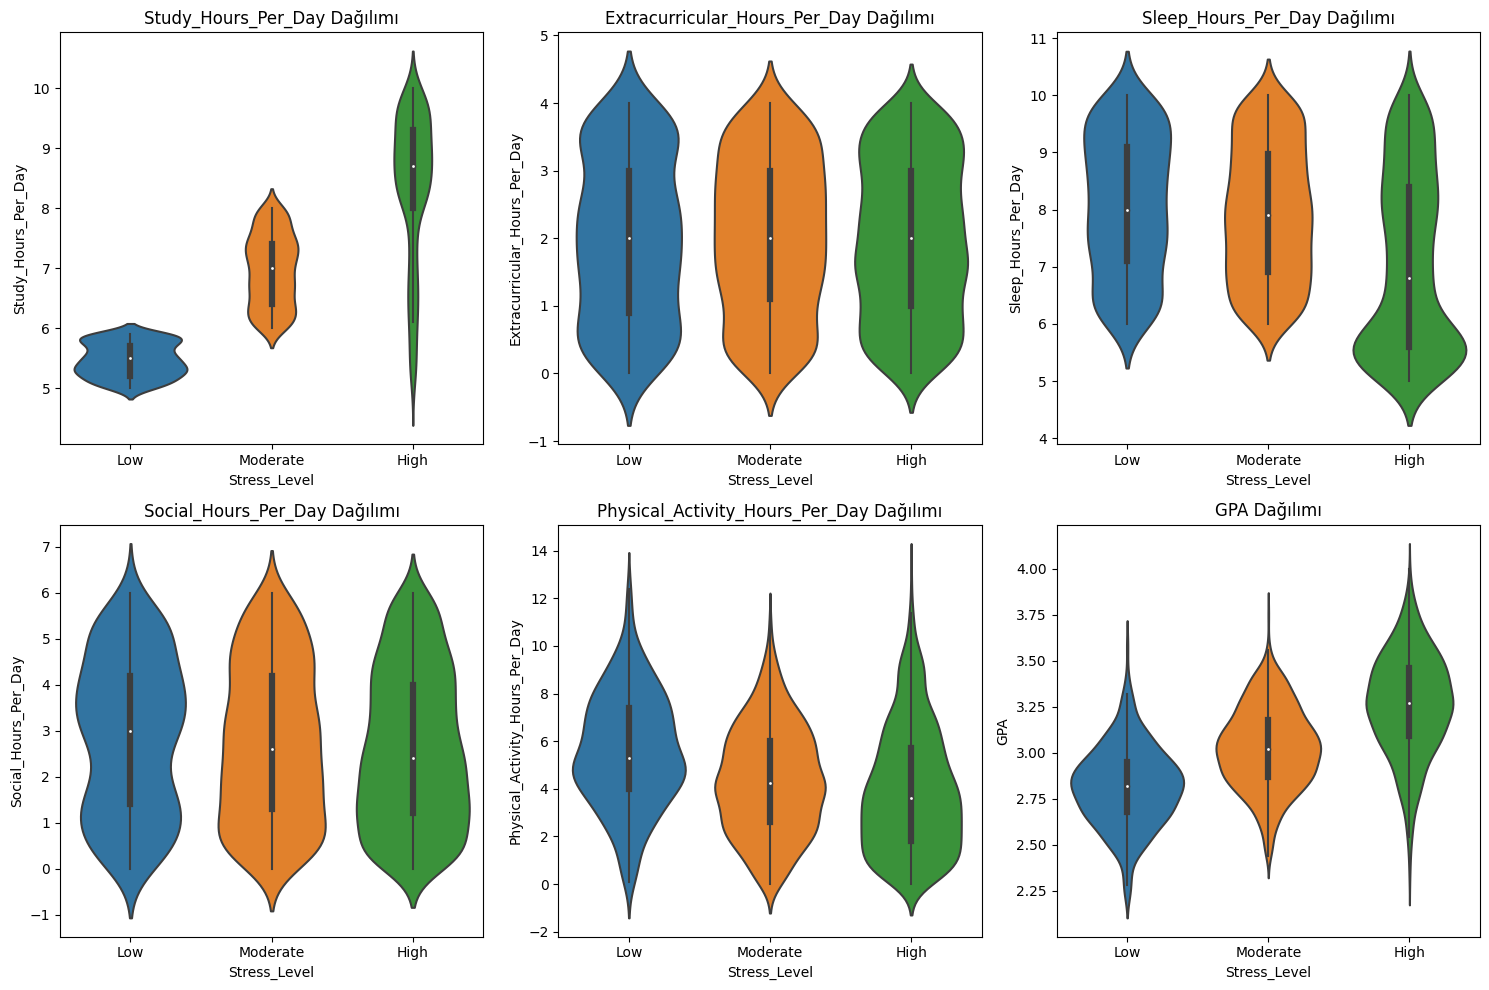

In [41]:
# Create violin plots for numeric columns vs. stress levels
numeric_columns = ['Study_Hours_Per_Day','Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                   'Physical_Activity_Hours_Per_Day', 'GPA', ]

plt.figure(figsize=(15,10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2,3,i)
    sns.violinplot(x='Stress_Level', y=column, data=stu, order=['Low', 'Moderate', 'High'])
    plt.title(f'{column} Dağılımı')

plt.tight_layout()
plt.show()

Violin grafiği sayesinde stres seviyesine göre gruplandırılan öğrencilerin sütunlardaki dağılımını daha yakından inceleyebileceğim. Bu grafikler arasında yaptığım gözlemler sonucunda stres seviyesine bağlı çalışma saatleri ve uyku saatleri grafiklerinin dikkate değer bir dağılımın varlığı görülüyor.
* Stres seviyesine göre gruplandırılan öğrencilerin çalışma saatlerini incelendiğinde  yüksek stres grubu için yüksek saatlerde yoğunlaştığını gözlemleniyor.
* Stres seviyesine göre gruplandırılan öğrencilerin uyku saatleri incelendiğinde ise yüksek  stres grubunu için düşük saatlerde yoğunlaştığı gözlemleniyor.

Amaç: Bundan sonra scatterplot grafikleri ile öğrencilerin gruplama yapılmaksızın günlük zaman harcamalarıyla başarı notu arasındaki ilişkinin gözlemlenmesi amaçlanmıştır. Bunun yanında stres seviyesine göre gruplandırılan öğrencilerin günlük zaman harcamalarıyla başarı notu arasındaki ilişkinin farklılıklar gösterip göstermediği eğer gösteriyorsa ne şekilde gösterdiği yakından irdelemek amaçlanmıştır.

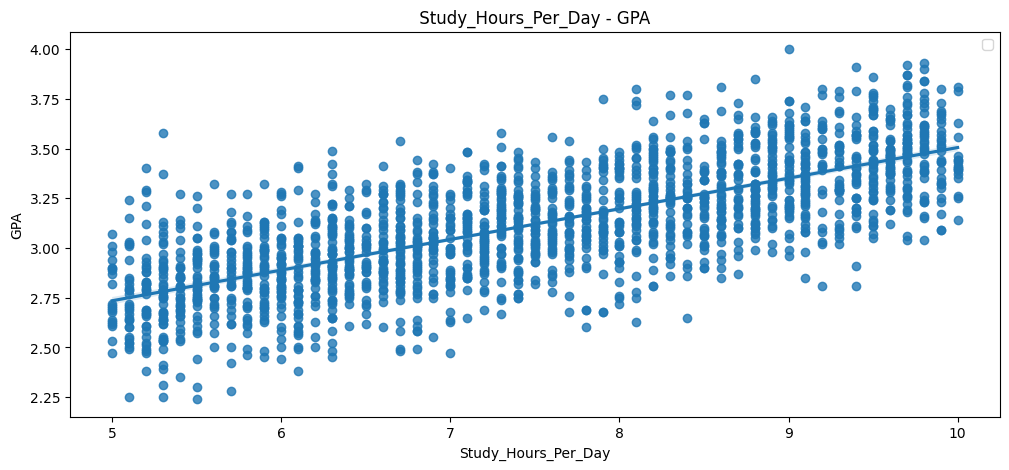

In [42]:
# Create a regression plot between Study Hours Per Day and GPA
plt.figure(figsize = (12,5))
sns.regplot(x = "Study_Hours_Per_Day", y = 'GPA', data = stu )
plt.title(" Study_Hours_Per_Day - GPA " , size = 12)
plt.legend()
plt.show()

Öğrencilerin çalışma saati ile başarı notu arasında güçlü ve pozitif bir ilişki olduğu gözlemleniyor.

In [43]:
# Filter students based on their stress level
stu_low = stu[stu['Stress_Level'] == 'Low'] 
stu_moderate = stu[stu['Stress_Level'] == 'Moderate']  
stu_high = stu[stu['Stress_Level'] == 'High']

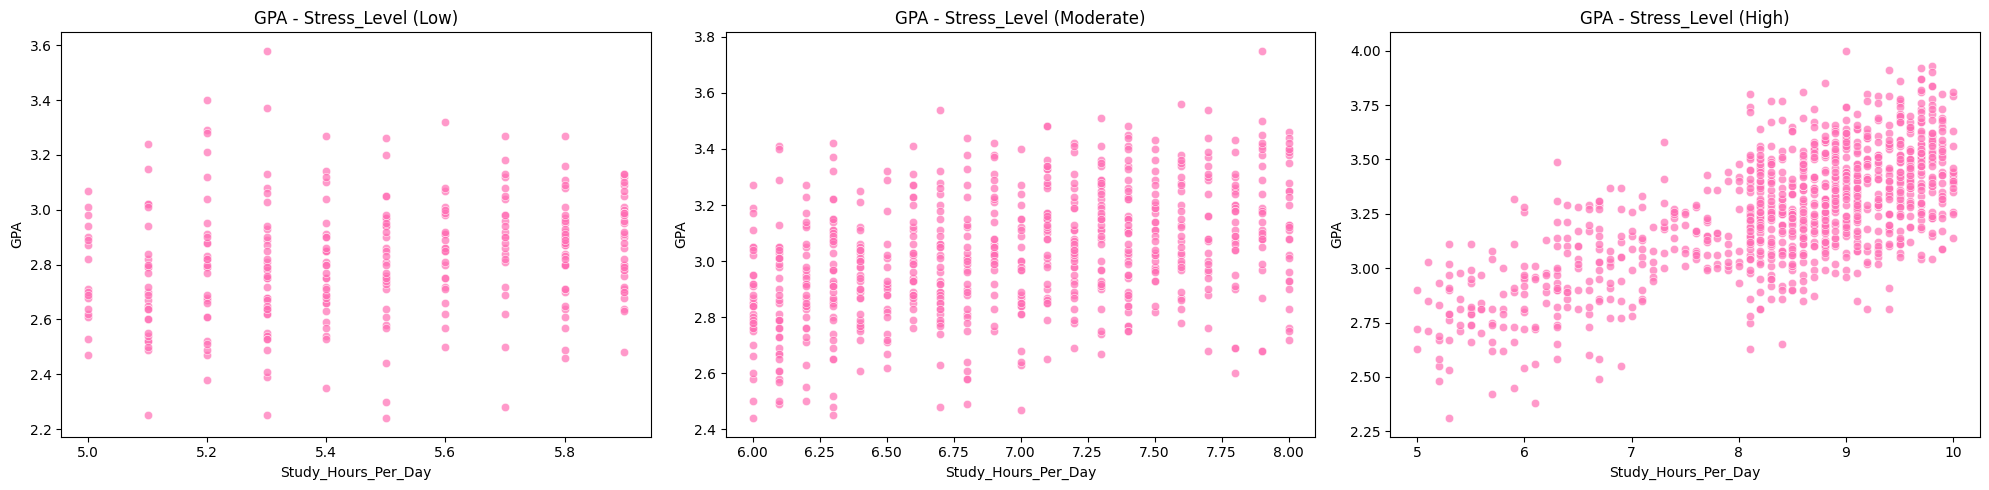

In [44]:
# Create subplots to visualize the relationship between Study Hours and GPA for different stress levels
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot for Low Stress Level
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=stu_low, ax=axes[0], alpha=0.7, color = '#ff6eb4')
axes[0].set_title('GPA - Stress_Level (Low)', size=12)

# Scatter plot for Moderate Stress Level
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=stu_moderate, ax=axes[1], alpha=0.7, color = '#ff6eb4')
axes[1].set_title('GPA - Stress_Level (Moderate)', size=12)

# Scatter plot for High Stress Level
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=stu_high, ax=axes[2], alpha=0.7, color = '#ff6eb4')
axes[2].set_title('GPA - Stress_Level (High)', size=12)

plt.tight_layout()
plt.show()

Bu grafikte stres seviyesine göre gruplandırılan öğrencilerin günlük zaman harcamalarıyla başarı notu arasındaki ilişkinin farklılıklar içerip içermediği incelemek amaçlanmıştır.

Stres seviyesi düşük ve orta olan öğrenci grubunun çalışma saati ile başarı notu arasında zayıf bir ilişki varken, stres seviyesi yüksek olan öğrenci grubunun çalışma saati ile başarı notu arasında güçlü ve pozitif bir ilişki olduğu gözlemleniyor.

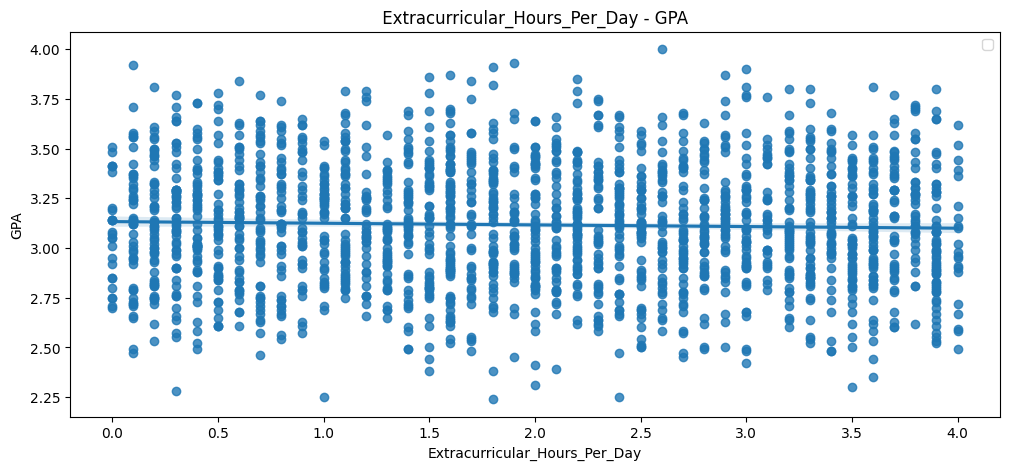

In [45]:
# Create a regression plot between Extracurricular Hours Per Day and GPA
plt.figure(figsize = (12,5))
sns.regplot(x = "Extracurricular_Hours_Per_Day", y = 'GPA', data = stu )
plt.title(" Extracurricular_Hours_Per_Day - GPA " , size = 12)
plt.legend()
plt.show()

Öğrencilerin extra çalışma saati ile başarı notu arasında ilişkinin zayıf olduğu gözlemleniyor.

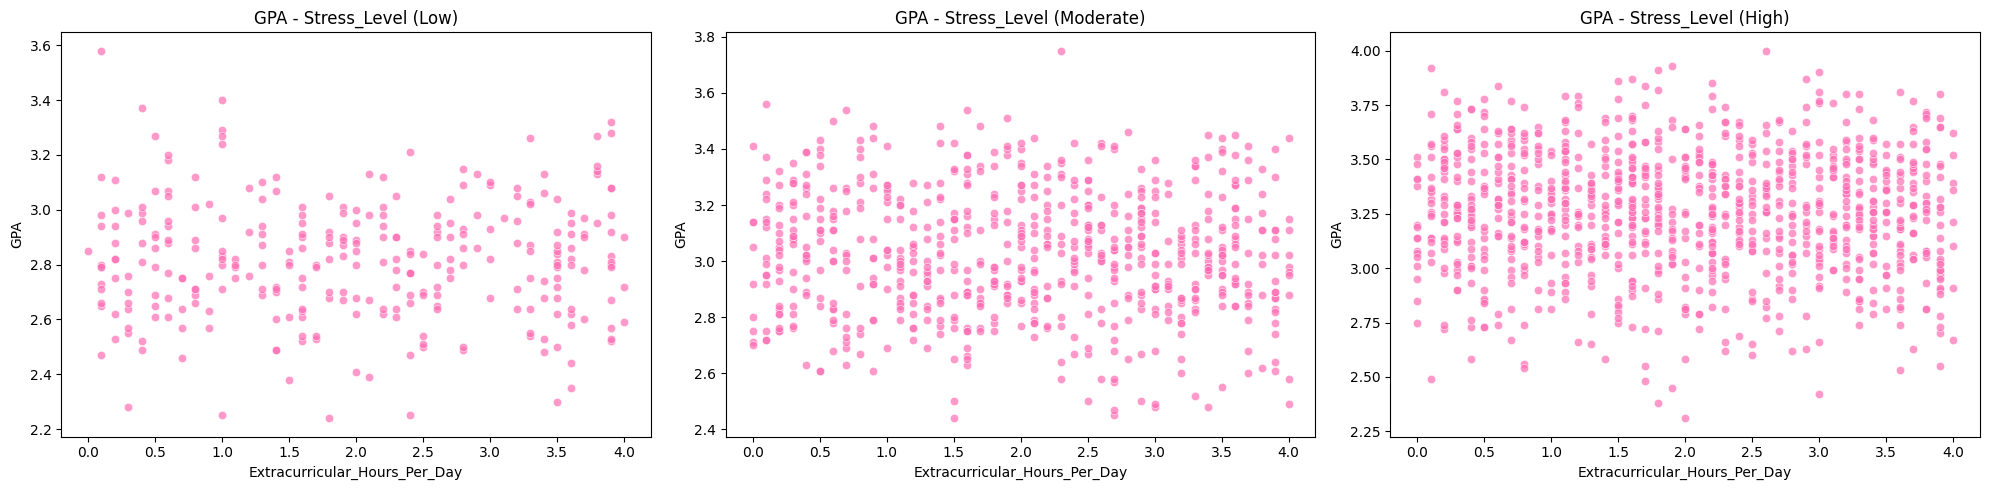

In [46]:
# Create subplots to visualize the relationship between Extracurricular Hours and GPA for different stress levels
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot for Low Stress Level
sns.scatterplot(x='Extracurricular_Hours_Per_Day', y='GPA', data=stu_low, ax=axes[0], alpha=0.7, color = '#ff6eb4')
axes[0].set_title('GPA - Stress_Level (Low)', size=12)

# Scatter plot for Moderate Stress Level
sns.scatterplot(x='Extracurricular_Hours_Per_Day', y='GPA', data=stu_moderate, ax=axes[1], alpha=0.7, color = '#ff6eb4')
axes[1].set_title('GPA - Stress_Level (Moderate)', size=12)

# Scatter plot for High Stress Level
sns.scatterplot(x='Extracurricular_Hours_Per_Day', y='GPA', data=stu_high, ax=axes[2], alpha=0.7, color = '#ff6eb4')
axes[2].set_title('GPA - Stress_Level (High)', size=12)

plt.tight_layout()
plt.show()

Stres seviyesine göre gruplandırılan öğrencilerin extra çalışma saati ile başarı notu arasındaki ilişki üç grup içinde zayıf olduğu gözlemleniyor.

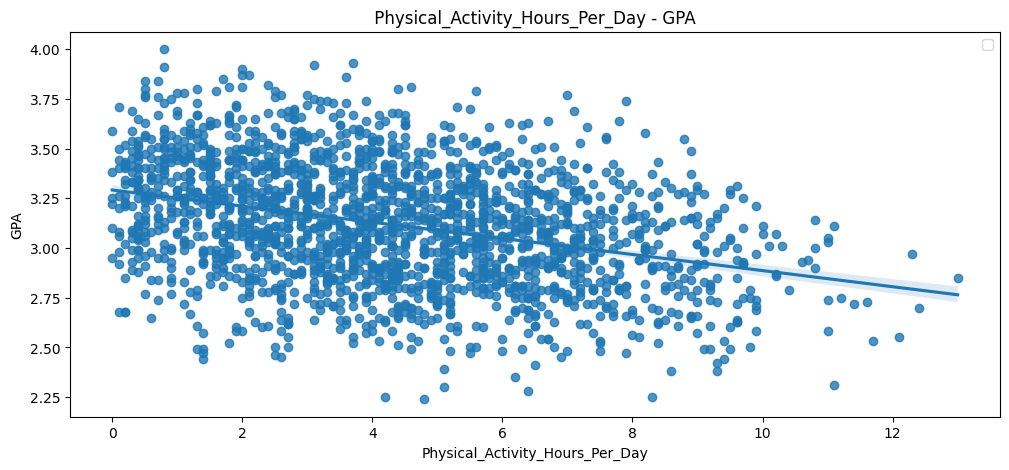

In [47]:
# Create a regression plot between Physical Activity Hours Per Day and GPA
plt.figure(figsize = (12,5))
sns.regplot(x = "Physical_Activity_Hours_Per_Day", y = 'GPA', data = stu )
plt.title(" Physical_Activity_Hours_Per_Day - GPA " , size = 12)
plt.legend()
plt.show()

Öğrencilerin fiziksel aktivite saati ile başarı notu arasında güçlü ve negatif bir ilişki olduğu gözlemleniyor.

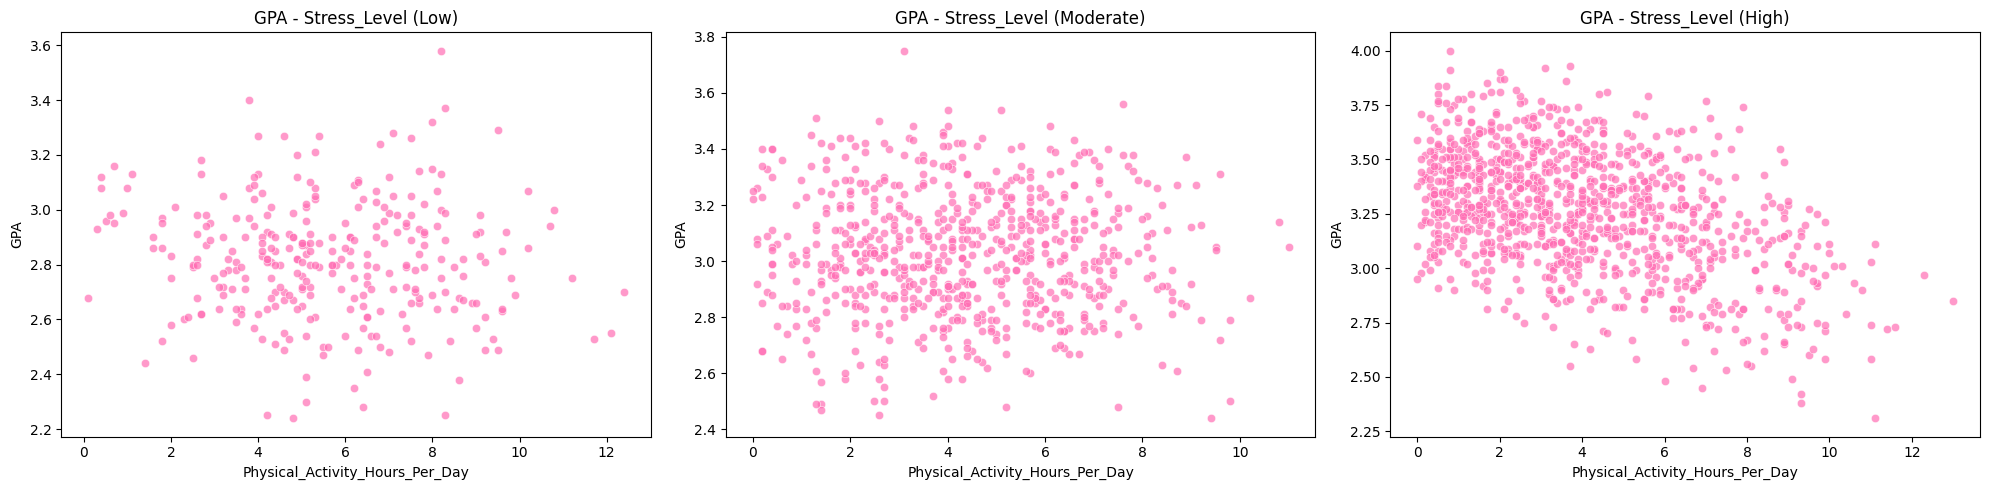

In [48]:
# Create subplots to visualize the relationship between Physical Activity Hours and GPA for different stress levels
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x='Physical_Activity_Hours_Per_Day', y='GPA', data=stu_low, ax=axes[0], alpha=0.7, color = '#ff6eb4')
axes[0].set_title('GPA - Stress_Level (Low)', size=12)

sns.scatterplot(x='Physical_Activity_Hours_Per_Day', y='GPA', data=stu_moderate, ax=axes[1], alpha=0.7, color = '#ff6eb4')
axes[1].set_title('GPA - Stress_Level (Moderate)', size=12)

sns.scatterplot(x='Physical_Activity_Hours_Per_Day', y='GPA', data=stu_high, ax=axes[2], alpha=0.7, color = '#ff6eb4')
axes[2].set_title('GPA - Stress_Level (High)', size=12)
plt.tight_layout()
plt.show()

Stres seviyesine göre gruplandırılan öğrencilerin, stres seviyesi düşük ve orta olan öğrenci gruplarında fiziksel aktivite saati ile başarı oranı arasında zayıf bir ilişki varken stres seviyesi yüksek olan öğrenci grubunun fiziksel aktivite saati ile başarı notu arasında güçlü ve negatif bir ilişki olduğu gözlemleniyor.

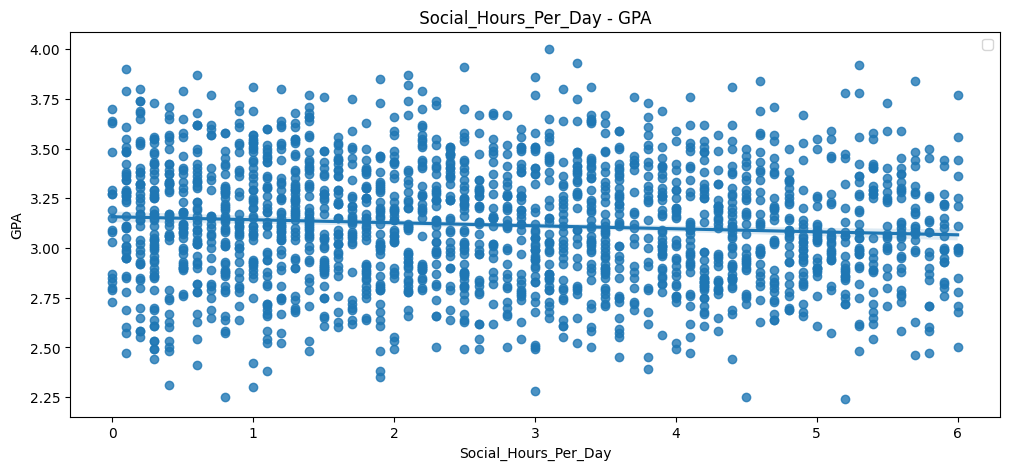

In [49]:
# Create a regression plot between Social Hours Per Day and GPA
plt.figure(figsize = (12,5))
sns.regplot(x = "Social_Hours_Per_Day", y = 'GPA', data = stu )
plt.title(" Social_Hours_Per_Day - GPA " , size = 12)
plt.legend()
plt.show()

Öğrencilerin sosyal aktivite saati ile başarı notu arasında zayıf bir ilişki olduğu gözlemleniyor.

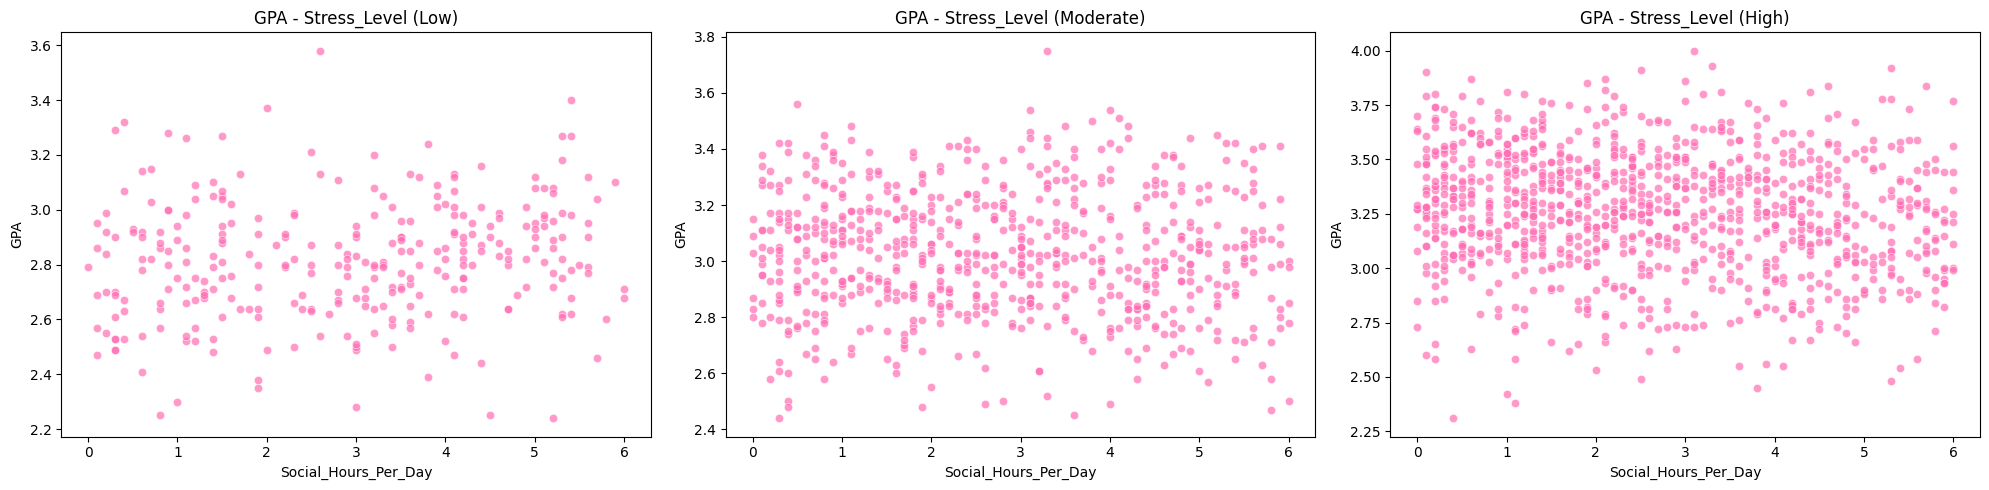

In [50]:
# Create subplots to visualize the relationship between Social Hours and GPA for different stress levels
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x='Social_Hours_Per_Day', y='GPA', data=stu_low, ax=axes[0], alpha=0.7, color = '#ff6eb4')
axes[0].set_title('GPA - Stress_Level (Low)', size=12)

sns.scatterplot(x='Social_Hours_Per_Day', y='GPA', data=stu_moderate, ax=axes[1], alpha=0.7, color = '#ff6eb4')
axes[1].set_title('GPA - Stress_Level (Moderate)', size=12)

sns.scatterplot(x='Social_Hours_Per_Day', y='GPA', data=stu_high, ax=axes[2], alpha=0.7, color = '#ff6eb4')
axes[2].set_title('GPA - Stress_Level (High)', size=12)
plt.tight_layout()
plt.show()

Stres seviyesine göre gruplandırılan öğrencilerin sosyal aktivite saati ile başarı notu arasındaki ilişki üç grup içinde zayıf olduğu gözlemleniyor.


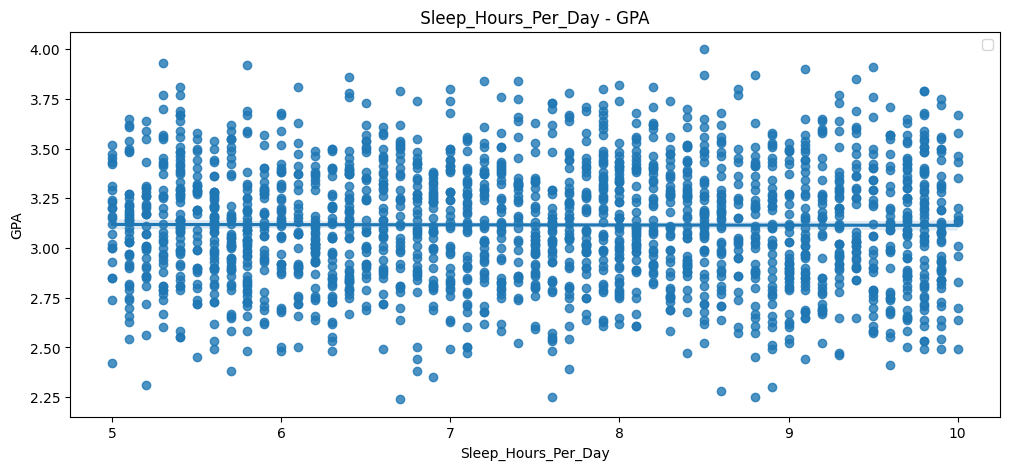

In [51]:
# Create a regression plot between Sleep Hours Per Day and GPA
plt.figure(figsize = (12,5))
sns.regplot(x = "Sleep_Hours_Per_Day", y = 'GPA', data = stu )
plt.title(" Sleep_Hours_Per_Day - GPA " , size = 12)
plt.legend()
plt.show()


Öğrencilerin uyku saati ile başarı notu arasında zayıf bir ilişki olduğu gözlemleniyor.

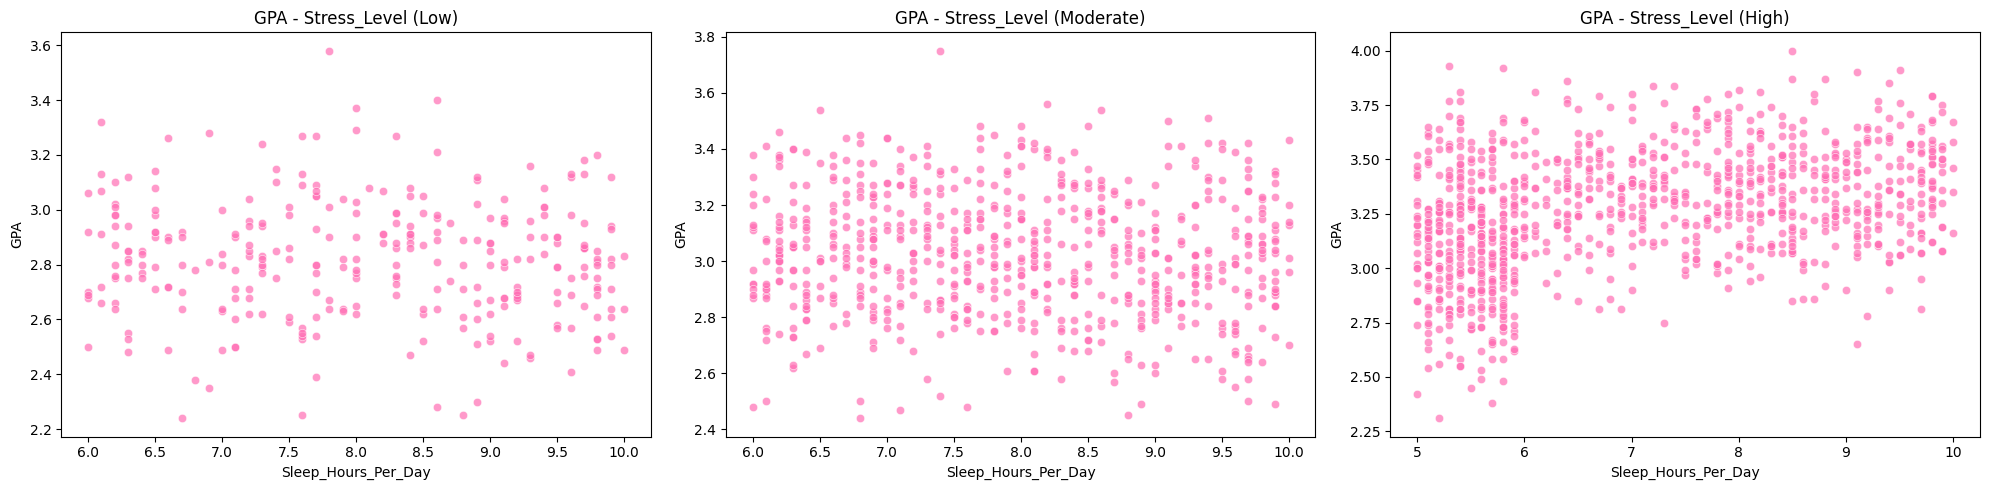

In [52]:
# Create subplots to visualize the relationship between Sleep Hours and GPA for different stress levels
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x='Sleep_Hours_Per_Day', y='GPA', data=stu_low, ax=axes[0], alpha=0.7, color = '#ff6eb4')
axes[0].set_title('GPA - Stress_Level (Low)', size=12)

sns.scatterplot(x='Sleep_Hours_Per_Day', y='GPA', data=stu_moderate, ax=axes[1], alpha=0.7, color = '#ff6eb4')
axes[1].set_title('GPA - Stress_Level (Moderate)', size=12)

sns.scatterplot(x='Sleep_Hours_Per_Day', y='GPA', data=stu_high, ax=axes[2], alpha=0.7, color = '#ff6eb4')
axes[2].set_title('GPA - Stress_Level (High)', size=12)
plt.tight_layout()
plt.show()

Stres seviyesine göre gruplandırılan öğrencilerin, stres seviyesi düşük ve orta olan öğrenci gruplarında uyku saati ile başarı oranı arasında zayıf bir ilişki varken stres seviyesi yüksek olan öğrenci grubunda uyku saati ile başarı notu arasında güçlü olmasa da pozitif bir ilişki olduğu gözlemleniyor.

Amaç: Pairplot grafiği ile öğrencilerin hem genel hem de stres seviyelerine göre gruplandırarak günlük çalışma, aktivite ve uyku saatleri arasındaki ilişki irdelemeyi amaçladım.

<Figure size 1500x1200 with 0 Axes>

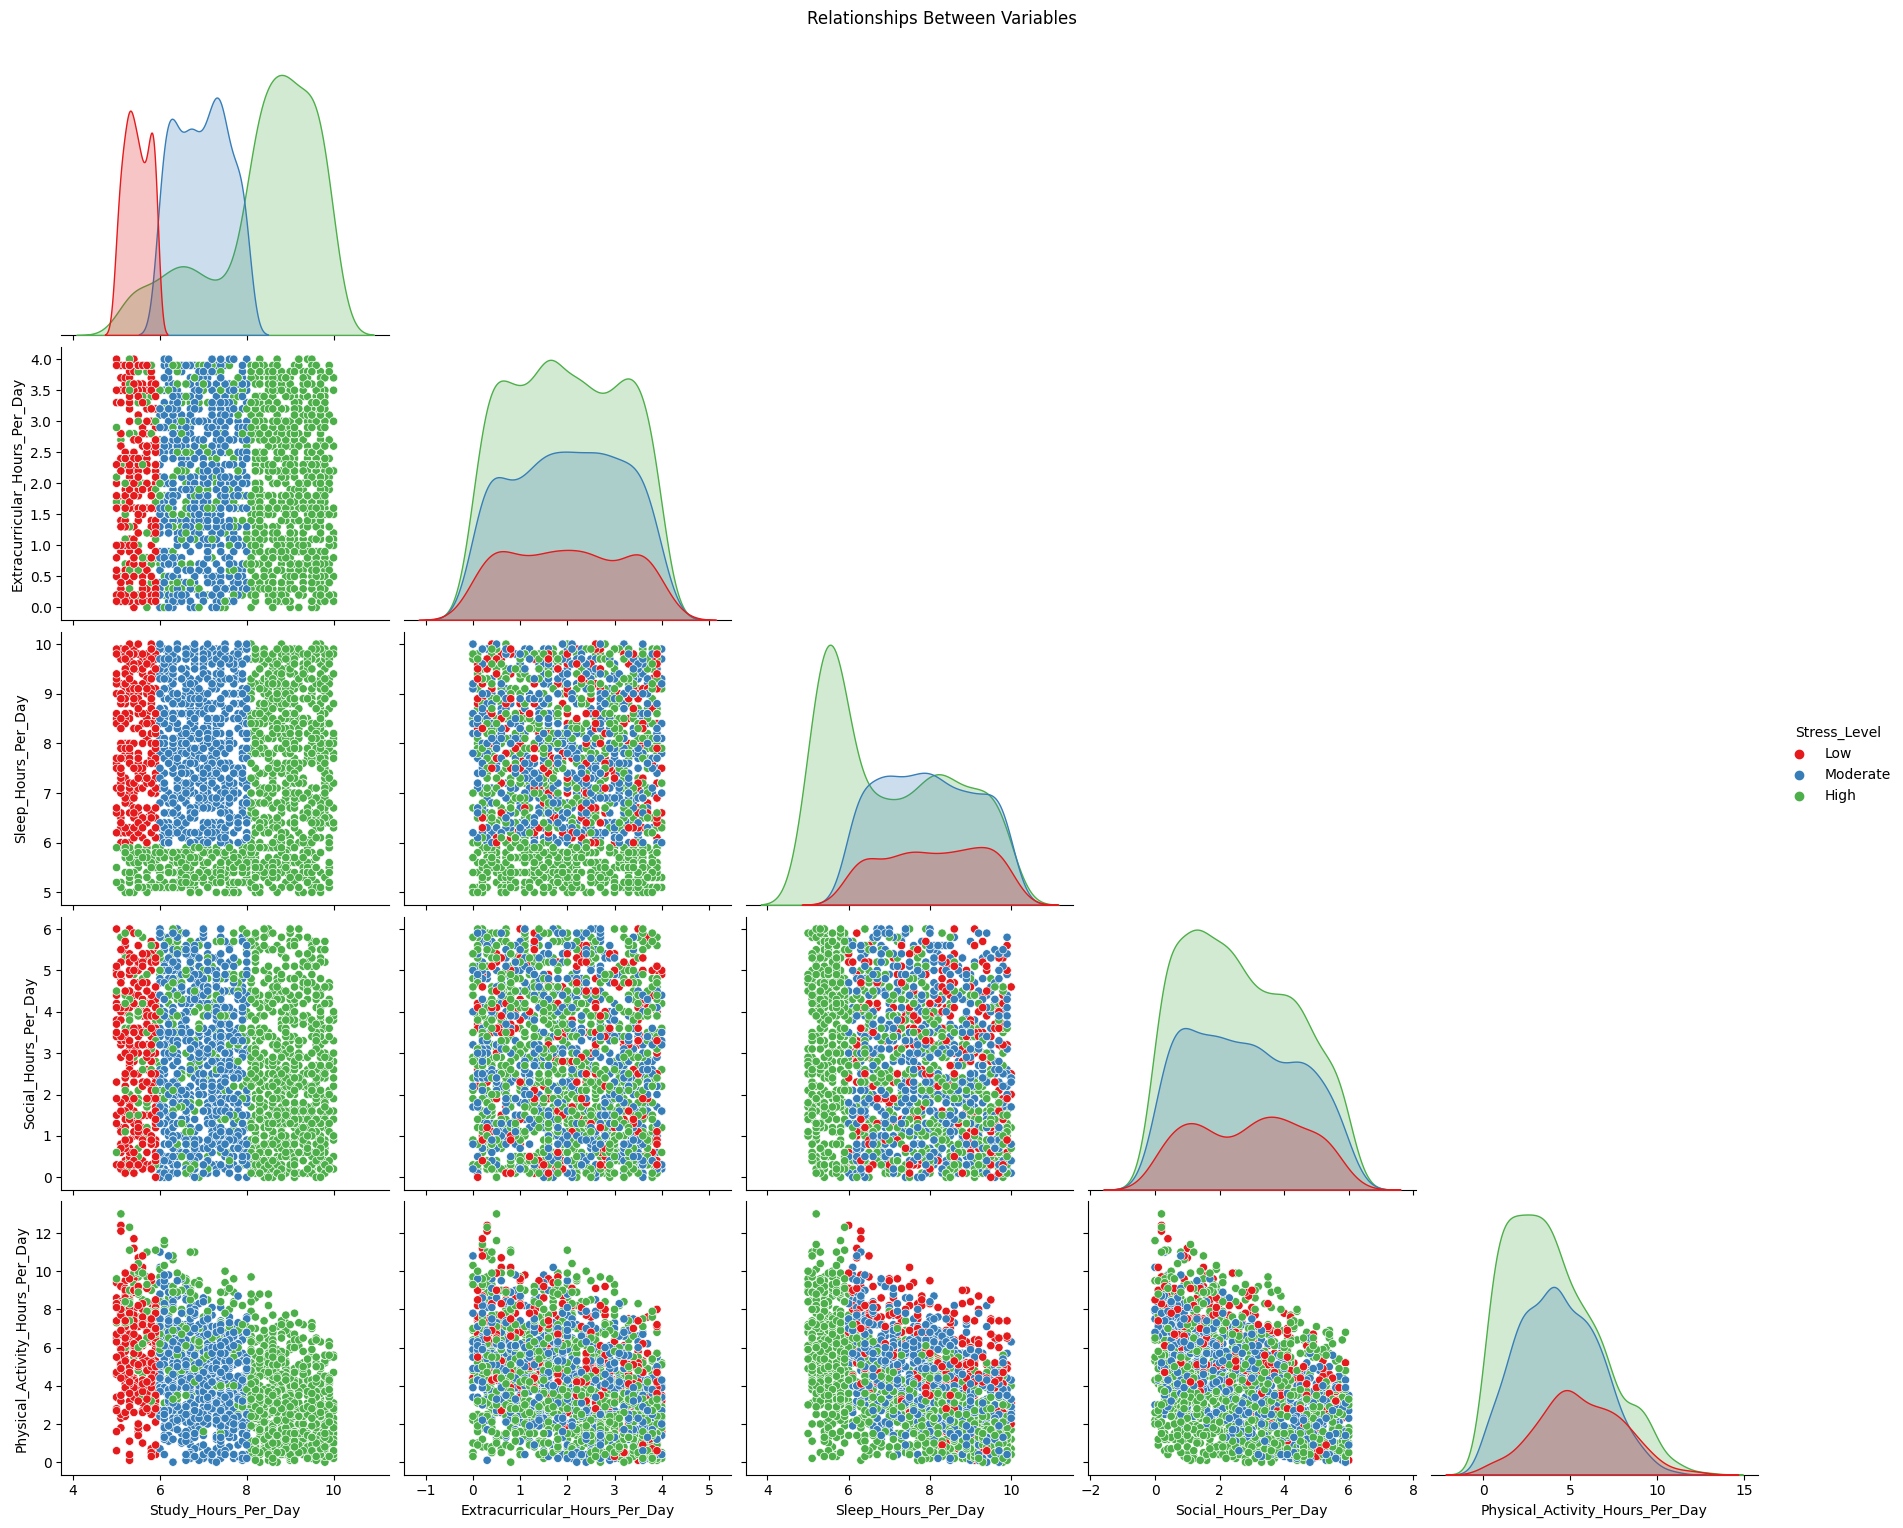

In [53]:
# Visualizing pairwise relationships between variables for different stress levels using a pairplot
plt.figure(figsize=(15,12))
sns.pairplot(stu, hue = 'Stress_Level', height = 3, aspect = 1.2, corner = True, palette = 'Set1', vars = ['Study_Hours_Per_Day','Extracurricular_Hours_Per_Day','Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day'])
plt.suptitle('Relationships Between Variables', y=1.02)
plt.show()


Öğrencilerin fiziksel aktivite saati ile sosyal aktivite, uyku ve çalışma saatleri arasında negatif bir ilişki olduğu gözlemleniyor.

Stres seviyesine göre gruplandırılan öğrencilerin günlük saat harcamaları arasındaki ilişki incelendiğinde ise genel öğrenci grubuyla benzer olduğu gözlemlendi.

In [54]:
# Selecting numeric columns from the dataset and calculating correlation between them
numeric_stu = stu.select_dtypes(include=['number'])
numeric_stu.corr()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
Student_ID,1.000000,0.014034,-0.018424,-0.001411,-0.004363,0.004273,0.005416
Study_Hours_Per_Day,0.014034,1.000000,-0.002629,0.026717,-0.137820,-0.488113,0.734468
Extracurricular_Hours_Per_Day,-0.018424,-0.002629,1.000000,0.008844,-0.139081,-0.369989,-0.032174
Sleep_Hours_Per_Day,-0.001411,0.026717,0.008844,1.000000,-0.193556,-0.470302,-0.004278
Social_Hours_Per_Day,-0.004363,-0.137820,-0.139081,-0.193556,1.000000,-0.417142,-0.085677
Physical_Activity_Hours_Per_Day,0.004273,-0.488113,-0.369989,-0.470302,-0.417142,1.000000,-0.341152
GPA,0.005416,0.734468,-0.032174,-0.004278,-0.085677,-0.341152,1.000000


Değişkenler arasındaki ilişkiyi corr() metodu ile inceleyebiliriz. Bu yöntem, varsayılan olarak Pearson korelasyon katsayısını kullanır ve bu değer +1 ile -1 arasında değişir. Korelasyon, iki değişken arasındaki doğrusal ilişkinin yönünü ve gücünü ölçer.

NOT: Korelasyon veya doğrusal ilişki nedensellik anlamına gelmez.

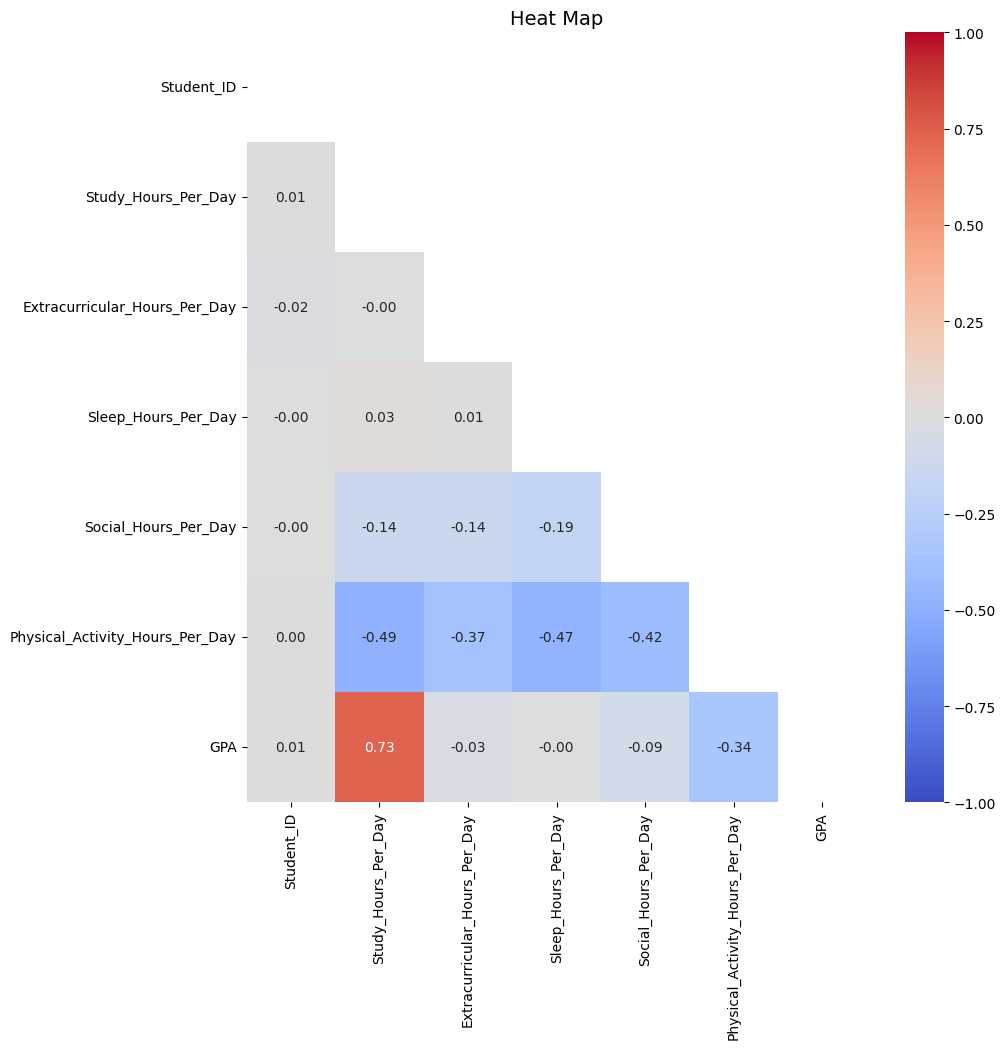

In [55]:
# Applying a heatmap to visualize the correlation between numeric variables with the upper triangle of the matrix hidden
plt.style.use('default')
mask = np.zeros_like(numeric_stu.corr())
mask[np.triu_indices_from(mask)] = True

# Creating the heatmap with customized settings
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(numeric_stu.corr(), annot=True, fmt='.2f',
            vmin=-1, vmax=1,
            ax=ax, cmap='coolwarm', mask=mask)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heat Map', size=14)
plt.show()


Heatmap grafiğine bakıldığında yukarıda farklı grafiklerle gözlemlediğim ilişkilerden farklı bir şey görmüyorum. En yüksek ilişkinin çalışma saati ile başarı notu arasında pozitif ve 0.73 değerinde iken ardından en yüksek ilişkinin çalışma saati ile fiziksel aktivite saatleri arasında negatif ve -0.5 değerinde olduğu görülüyor.
